In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('PlayStoreApps-ParticipantsData/Train.csv',
                    parse_dates=['Last_Updated_On'])
dataset.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,2020-05-05,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,2020-03-26,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,2020-05-01,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,2020-05-02,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,2018-11-29,Varies with device,Varies with device,"5,000+"


In [3]:
df=dataset.copy()

In [4]:
df['Updated_year']=df.Last_Updated_On.dt.year
df['Updated_month']=df.Last_Updated_On.dt.month
df['Updated_day']=df.Last_Updated_On.dt.day
df.drop('Last_Updated_On',axis=1,inplace=True)
df.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,Varies with device,Varies with device,"100,000+",2020,5,5
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,3.9.18,4.1 and up,"5,000+",2020,3,26
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,1.10.1,4.1 and up,"10,000+",2020,5,1
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,Varies with device,Varies with device,"10,000,000+",2020,5,2
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Varies with device,Varies with device,"5,000+",2018,11,29


In [5]:
df['Offered_By']=df['Offered_By'].str.slice(6).astype('int64')
df.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day
0,24654,Finance,4.18,1481,Varies with device,Free,Everyone,Varies with device,Varies with device,"100,000+",2020,5,5
1,35329,Music And Audio,4.81,302,10M,Free,Everyone,3.9.18,4.1 and up,"5,000+",2020,3,26
2,11044,Game Casual,4.27,374,27M,Free,Everyone,1.10.1,4.1 and up,"10,000+",2020,5,1
3,36068,Business,4.03,122058,Varies with device,Free,Teen,Varies with device,Varies with device,"10,000,000+",2020,5,2
4,35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Varies with device,Varies with device,"5,000+",2018,11,29


In [6]:
d1={'100,000+':8, '5,000+':5, '10,000+':6, '10,000,000+':12, '50,000+':7,
       '1,000,000+':10, '5,000,000+':11, '500,000+':9, '1,000+':4, '1,000,000,000+':16,
       '50,000,000+':13, '100+':2, '100,000,000+':14, '500+':3, '10+':0, '50+':1,
       '500,000,000+':15, '5,000,000,000+':17}
df.Downloads=df['Downloads'].map(d1)
df.head(10)

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day
0,24654,Finance,4.18,1481,Varies with device,Free,Everyone,Varies with device,Varies with device,8,2020,5,5
1,35329,Music And Audio,4.81,302,10M,Free,Everyone,3.9.18,4.1 and up,5,2020,3,26
2,11044,Game Casual,4.27,374,27M,Free,Everyone,1.10.1,4.1 and up,6,2020,5,1
3,36068,Business,4.03,122058,Varies with device,Free,Teen,Varies with device,Varies with device,12,2020,5,2
4,35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Varies with device,Varies with device,5,2018,11,29
5,17918,Books And Reference,4.80,40,2.3M,Free,Everyone,3,4.1 and up,6,2019,2,5
6,11727,Finance,4.60,1992,24M,Free,Everyone,3000.5.3532,5.0 and up,7,2019,7,25
7,4496,Tools,4.62,37975,20M,Free,Everyone,1.28.1,4.4 and up,10,2020,5,5
8,9590,Finance,3.20,191,10M,Free,Everyone,4.5.6,4.0 and up,6,2019,3,1
9,7167,Game,4.10,349503,19M,Free,Everyone,1.31,4.0 and up,12,2016,9,29


In [7]:
mean_ordinal=df.groupby(['Category'])['Downloads'].mean().to_dict()
mean_ordinal

{'Art And Design': 7.640449438202247,
 'Auto And Vehicles': 7.420634920634921,
 'Beauty': 7.4363636363636365,
 'Books And Reference': 7.337381916329285,
 'Business': 6.698656429942418,
 'Comics': 7.6875,
 'Communication': 8.208219178082192,
 'Dating': 7.34453781512605,
 'Education': 6.5993055555555555,
 'Entertainment': 7.836030204962244,
 'Events': 5.7368421052631575,
 'Family': 8.0466472303207,
 'Finance': 7.859070464767616,
 'Food And Drink': 7.238738738738738,
 'Game': 10.248826291079812,
 'Game Action': 9.319148936170214,
 'Game Adventure': 8.384615384615385,
 'Game Arcade': 8.946428571428571,
 'Game Board': 8.541284403669724,
 'Game Card': 8.46875,
 'Game Casino': 9.492957746478874,
 'Game Casual': 8.818815331010454,
 'Game Educational': 8.167597765363128,
 'Game Music': 9.204545454545455,
 'Game Puzzle': 8.253768844221106,
 'Game Racing': 10.508333333333333,
 'Game Role Playing': 8.757396449704142,
 'Game Simulation': 9.255208333333334,
 'Game Sports': 9.272727272727273,
 'Game 

In [8]:
df.Category=df['Category'].map(mean_ordinal)
df.head(10)

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day
0,24654,7.859070,4.18,1481,Varies with device,Free,Everyone,Varies with device,Varies with device,8,2020,5,5
1,35329,7.416350,4.81,302,10M,Free,Everyone,3.9.18,4.1 and up,5,2020,3,26
2,11044,8.818815,4.27,374,27M,Free,Everyone,1.10.1,4.1 and up,6,2020,5,1
3,36068,6.698656,4.03,122058,Varies with device,Free,Teen,Varies with device,Varies with device,12,2020,5,2
4,35831,5.895706,4.60,358,Varies with device,297.5742,Everyone,Varies with device,Varies with device,5,2018,11,29
5,17918,7.337382,4.80,40,2.3M,Free,Everyone,3,4.1 and up,6,2019,2,5
6,11727,7.859070,4.60,1992,24M,Free,Everyone,3000.5.3532,5.0 and up,7,2019,7,25
7,4496,7.972380,4.62,37975,20M,Free,Everyone,1.28.1,4.4 and up,10,2020,5,5
8,9590,7.859070,3.20,191,10M,Free,Everyone,4.5.6,4.0 and up,6,2019,3,1
9,7167,10.248826,4.10,349503,19M,Free,Everyone,1.31,4.0 and up,12,2016,9,29


In [9]:
def encoder(feature):
    
    mean_ordinal=df.groupby([feature])['Downloads'].mean().to_dict()
    df[feature]=df[feature].map(mean_ordinal)


In [10]:
encoder('Size')
encoder('Release_Version')
encoder('OS_Version_Required')


In [11]:
df

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day
0,24654,7.859070,4.18,1481,10.094891,Free,Everyone,10.156697,10.198484,8,2020,5,5
1,35329,7.416350,4.81,302,7.354369,Free,Everyone,5.000000,7.862938,5,2020,3,26
2,11044,8.818815,4.27,374,7.565789,Free,Everyone,7.375000,7.862938,6,2020,5,1
3,36068,6.698656,4.03,122058,10.094891,Free,Teen,10.156697,10.198484,12,2020,5,2
4,35831,5.895706,4.60,358,10.094891,297.5742,Everyone,10.156697,10.198484,5,2018,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,5583,7.786848,4.30,13724,10.094891,Free,Everyone,10.156697,10.198484,10,2018,9,21
16512,15485,7.436364,4.73,70,7.058824,Free,Everyone,6.500000,7.862938,6,2020,5,7
16513,36065,7.786848,4.60,5420,7.894231,Free,Everyone,9.000000,7.862938,9,2019,7,10
16514,12625,8.191228,4.60,1488289,10.094891,Free,Everyone,10.156697,10.198484,14,2019,9,7


In [12]:
df.Price=np.where(df.Price=='Free',0,df.Price)

In [13]:
df.Price=df.Price.astype('float64')
df.Price.dtype

dtype('float64')

In [14]:
df=pd.concat([df,pd.get_dummies(df.Content_Rating,drop_first=True)],axis=1)
df

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,24654,7.859070,4.18,1481,10.094891,0.0000,Everyone,10.156697,10.198484,8,2020,5,5,1,0,0,0,0
1,35329,7.416350,4.81,302,7.354369,0.0000,Everyone,5.000000,7.862938,5,2020,3,26,1,0,0,0,0
2,11044,8.818815,4.27,374,7.565789,0.0000,Everyone,7.375000,7.862938,6,2020,5,1,1,0,0,0,0
3,36068,6.698656,4.03,122058,10.094891,0.0000,Teen,10.156697,10.198484,12,2020,5,2,0,0,0,1,0
4,35831,5.895706,4.60,358,10.094891,297.5742,Everyone,10.156697,10.198484,5,2018,11,29,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,5583,7.786848,4.30,13724,10.094891,0.0000,Everyone,10.156697,10.198484,10,2018,9,21,1,0,0,0,0
16512,15485,7.436364,4.73,70,7.058824,0.0000,Everyone,6.500000,7.862938,6,2020,5,7,1,0,0,0,0
16513,36065,7.786848,4.60,5420,7.894231,0.0000,Everyone,9.000000,7.862938,9,2019,7,10,1,0,0,0,0
16514,12625,8.191228,4.60,1488289,10.094891,0.0000,Everyone,10.156697,10.198484,14,2019,9,7,1,0,0,0,0


In [15]:
df.drop('Content_Rating',axis=1,inplace=True)
df

,Offered_By,Category,Rating,Reviews,Size,Price,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,24654,7.859070,4.18,1481,10.094891,0.0000,10.156697,10.198484,8,2020,5,5,1,0,0,0,0
1,35329,7.416350,4.81,302,7.354369,0.0000,5.000000,7.862938,5,2020,3,26,1,0,0,0,0
2,11044,8.818815,4.27,374,7.565789,0.0000,7.375000,7.862938,6,2020,5,1,1,0,0,0,0
3,36068,6.698656,4.03,122058,10.094891,0.0000,10.156697,10.198484,12,2020,5,2,0,0,0,1,0
4,35831,5.895706,4.60,358,10.094891,297.5742,10.156697,10.198484,5,2018,11,29,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,5583,7.786848,4.30,13724,10.094891,0.0000,10.156697,10.198484,10,2018,9,21,1,0,0,0,0
16512,15485,7.436364,4.73,70,7.058824,0.0000,6.500000,7.862938,6,2020,5,7,1,0,0,0,0
16513,36065,7.786848,4.60,5420,7.894231,0.0000,9.000000,7.862938,9,2019,7,10,1,0,0,0,0
16514,12625,8.191228,4.60,1488289,10.094891,0.0000,10.156697,10.198484,14,2019,9,7,1,0,0,0,0


In [16]:
df.drop(df[df['Downloads']==17].index.values,axis=0,inplace=True)
df

,Offered_By,Category,Rating,Reviews,Size,Price,Release_Version,OS_Version_Required,Downloads,Updated_year,Updated_month,Updated_day,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,24654,7.859070,4.18,1481,10.094891,0.0000,10.156697,10.198484,8,2020,5,5,1,0,0,0,0
1,35329,7.416350,4.81,302,7.354369,0.0000,5.000000,7.862938,5,2020,3,26,1,0,0,0,0
2,11044,8.818815,4.27,374,7.565789,0.0000,7.375000,7.862938,6,2020,5,1,1,0,0,0,0
3,36068,6.698656,4.03,122058,10.094891,0.0000,10.156697,10.198484,12,2020,5,2,0,0,0,1,0
4,35831,5.895706,4.60,358,10.094891,297.5742,10.156697,10.198484,5,2018,11,29,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,5583,7.786848,4.30,13724,10.094891,0.0000,10.156697,10.198484,10,2018,9,21,1,0,0,0,0
16512,15485,7.436364,4.73,70,7.058824,0.0000,6.500000,7.862938,6,2020,5,7,1,0,0,0,0
16513,36065,7.786848,4.60,5420,7.894231,0.0000,9.000000,7.862938,9,2019,7,10,1,0,0,0,0
16514,12625,8.191228,4.60,1488289,10.094891,0.0000,10.156697,10.198484,14,2019,9,7,1,0,0,0,0


In [17]:
X=df.drop('Downloads',axis=1)
y=df.Downloads

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13212, 16), (13212,), (3303, 16), (3303,))

In [21]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
grid_clf=GridSearchCV(clf,param_grid={'n_estimators':[10,20,30,50,70,100]},cv=5)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 50, 70, 100]})

In [22]:
grid_clf.best_params_

{'n_estimators': 100}

In [23]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_preds=clf.predict(X_test)
y_preds

array([ 6,  6, 10, ..., 10,  6,  8], dtype=int64)

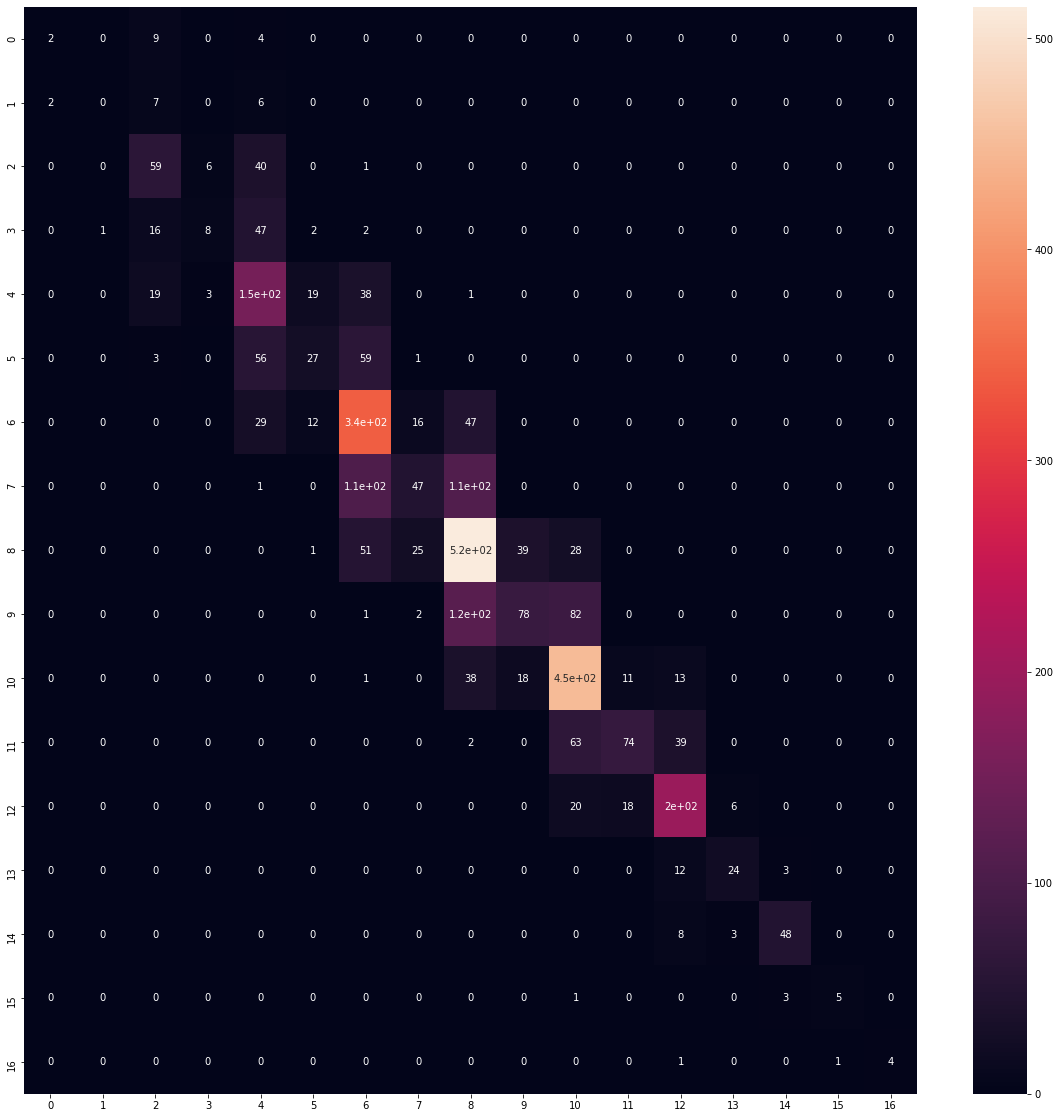

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [26]:
f1_score(y_test,y_preds,average=None)

array([0.21052632, 0.        , 0.53881279, 0.17204301, 0.53778559,
       0.26086957, 0.65263158, 0.26553672, 0.69173942, 0.375     ,
       0.76595745, 0.52669039, 0.77192982, 0.66666667, 0.84955752,
       0.66666667, 0.8       ])

In [27]:
from sklearn.metrics import classification_report
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.50      0.13      0.21        15\n           1       0.00      0.00      0.00        15\n           2       0.52      0.56      0.54       106\n           3       0.47      0.11      0.17        76\n           4       0.46      0.66      0.54       233\n           5       0.44      0.18      0.26       146\n           6       0.57      0.77      0.65       445\n           7       0.52      0.18      0.27       263\n           8       0.62      0.78      0.69       659\n           9       0.58      0.28      0.38       281\n          10       0.70      0.85      0.77       531\n          11       0.72      0.42      0.53       178\n          12       0.73      0.82      0.77       242\n          13       0.73      0.62      0.67        39\n          14       0.89      0.81      0.85        59\n          15       0.83      0.56      0.67         9\n          16       1.00      0.67      0.80         6\n\n    a

In [28]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
print(accuracy_score(y_test,y_preds))
print()
print(recall_score(y_test,y_preds,average=None))
print()
print(precision_score(y_test,y_preds,average=None
                     ))

0.615501059642749

[0.13333333 0.         0.55660377 0.10526316 0.65665236 0.18493151
 0.76629213 0.17870722 0.7814871  0.27758007 0.84745763 0.41573034
 0.81818182 0.61538462 0.81355932 0.55555556 0.66666667]

[0.5        0.         0.52212389 0.47058824 0.45535714 0.44262295
 0.56833333 0.51648352 0.62048193 0.57777778 0.69875776 0.7184466
 0.73062731 0.72727273 0.88888889 0.83333333 1.        ]


In [30]:
df.Downloads.value_counts()

8     3158
10    2707
6     2239
9     1360
12    1277
7     1243
4     1221
11     912
5      763
2      508
3      364
14     266
13     247
0       91
1       84
15      42
16      33
Name: Downloads, dtype: int64

In [31]:
4.8e+02

480.0

In [ ]:
import sys
!{sys.executable} -m pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)




ValueError: could not convert string to float: 'ps_id-24654'

In [21]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({8: 3158, 10: 2707, 6: 2239, 9: 1360, 12: 1277, 7: 1243, 4: 1221, 11: 912, 5: 763, 2: 508, 3: 364, 14: 266, 13: 247, 0: 91, 1: 84, 15: 42, 16: 33})
Counter({8: 3158, 5: 3158, 6: 3158, 12: 3158, 7: 3158, 10: 3158, 11: 3158, 9: 3158, 4: 3158, 16: 3158, 13: 3158, 2: 3158, 14: 3158, 3: 3158, 0: 3158, 1: 3158, 15: 3158})


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2)

In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((42948, 16), (42948,), (10738, 16), (10738,))

In [38]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_preds=clf.predict(X_test)

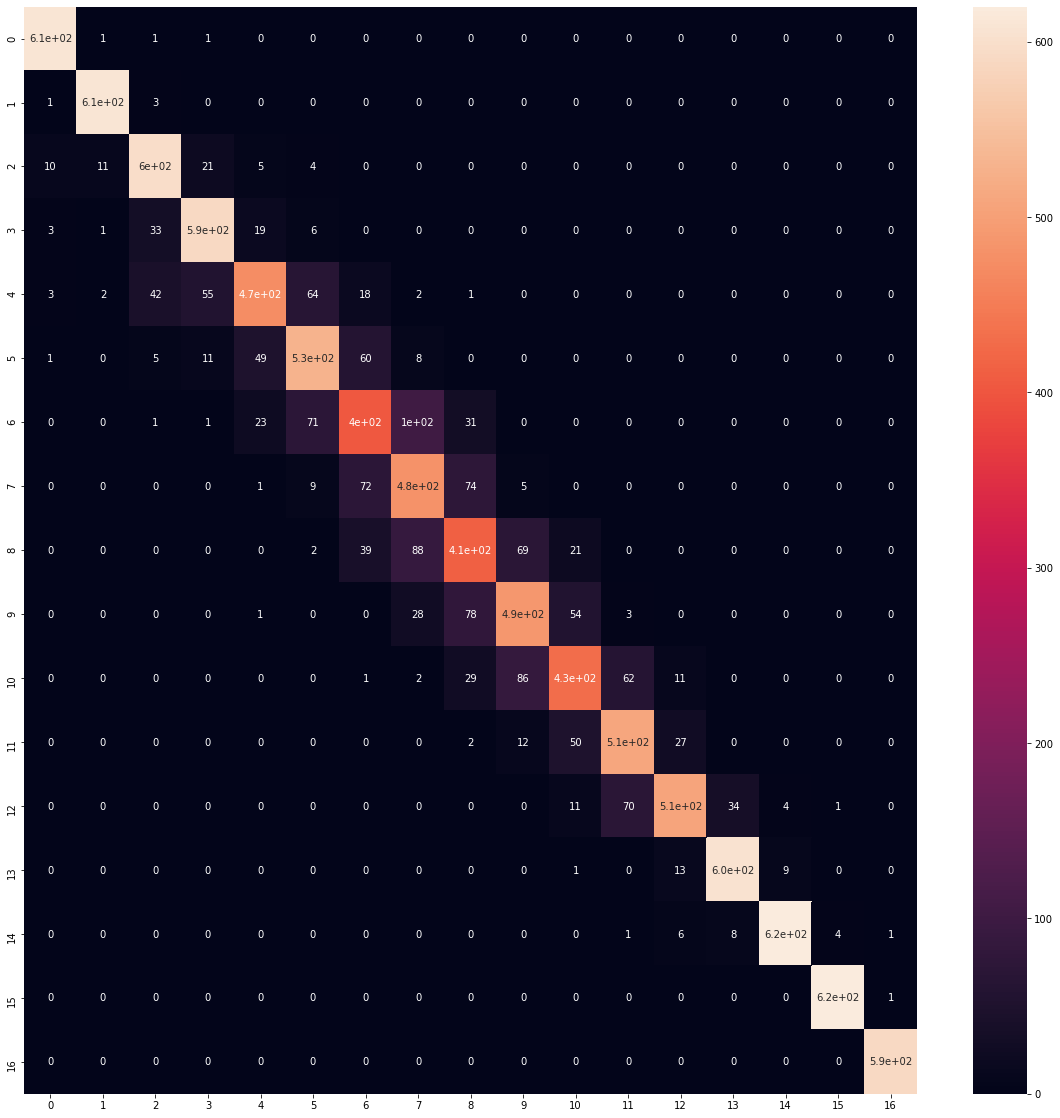

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [47]:
precision_score(y_test,y_preds,average=None)

array([0.97129187, 0.97596154, 0.87554905, 0.86892489, 0.82867133,
       0.77259475, 0.67959528, 0.6755618 , 0.6581876 , 0.7397882 ,
       0.75837743, 0.78947368, 0.89893617, 0.93508501, 0.97939778,
       0.992     , 0.99662162])

In [48]:
recall_score(y_test,y_preds,average=None)

array([0.99509804, 0.99347471, 0.92141757, 0.90490798, 0.71709531,
       0.79819277, 0.63665087, 0.74922118, 0.65402844, 0.74885145,
       0.69243156, 0.84858569, 0.80861244, 0.9633758 , 0.96865204,
       0.99838969, 1.        ])

In [54]:
f1_score(y_test,y_preds,average=None)

array([0.98305085, 0.98464026, 0.8978979 , 0.88655147, 0.76885645,
       0.78518519, 0.65742251, 0.71048744, 0.65610143, 0.74429224,
       0.72390572, 0.81796311, 0.85138539, 0.94901961, 0.97399527,
       0.99518459, 0.99830795])

In [29]:
grid={'bootstrap': [True, False],
 'max_depth': [10, 20,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,110,120,130,140,150]}
grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 110, 120, 130, 140, 150]}

In [26]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=5,shuffle=False)

In [22]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,log_loss
def evaluate(model):
    y_preds=model.predict(X_test)
    print(precision_score(y_test,y_preds,average=None))
    print()
    print(recall_score(y_test,y_preds,average=None))
    print()
    print(f1_score(y_test,y_preds,average=None))
    print()
   
    plt.figure(figsize=(20,20))
    sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
clf2=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = clf2, param_distributions = grid, n_iter = 10, cv = cv, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.3min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150]},
                   random_state=42, verbose=2)

In [33]:
rf_random.best_params_

{'n_estimators': 140,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [35]:
clf2=RandomForestClassifier(n_estimators=140,
                            min_samples_split= 2,
                            min_samples_leaf=1,
                            max_features= 'auto',
                            max_depth= None,
                            bootstrap= True)
clf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=140)

[0.96025437 0.97810219 0.88540031 0.86464968 0.80677291 0.75770925
 0.6863354  0.7235023  0.7027027  0.7254902  0.72156197 0.80392157
 0.88019967 0.93636364 0.98320611 0.99361022 1.        ]

[0.99342105 0.99850969 0.89666137 0.88436482 0.69230769 0.82428115
 0.66868381 0.72461538 0.68421053 0.75748031 0.70715474 0.8328125
 0.80763359 0.97169811 0.96987952 1.         1.        ]

[0.97655618 0.98820059 0.89099526 0.87439614 0.74517019 0.78959449
 0.67739464 0.72405842 0.69333333 0.74114022 0.71428571 0.81811205
 0.84235669 0.9537037  0.97649735 0.99679487 1.        ]


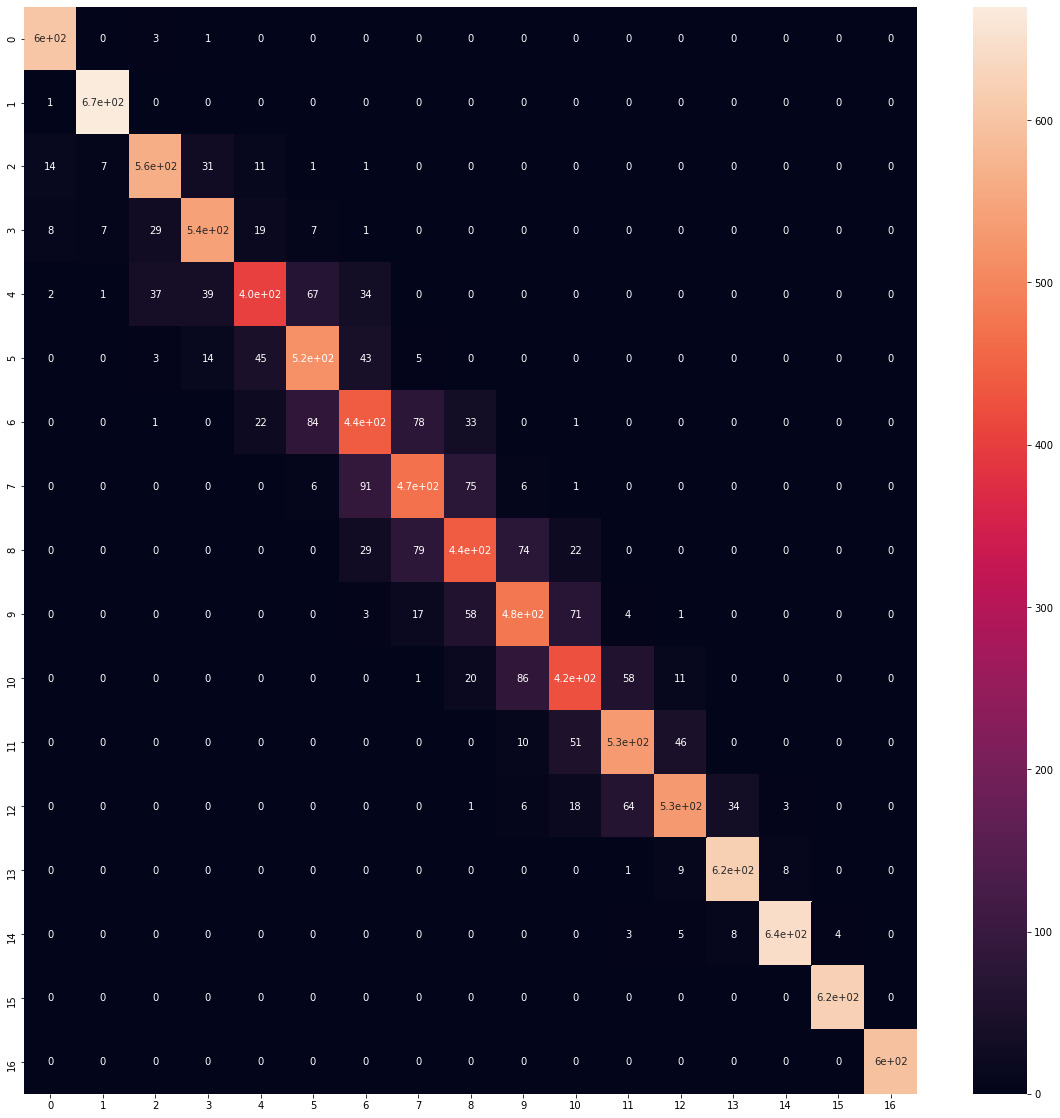

In [41]:
evaluate(clf2)


In [60]:
y_pred=clf2.predict_proba(X_test)
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

0.5655291067465535

In [61]:
pd.DataFrame(y_pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007143,0.000000,0.007143,0.000000,0.000000,0.000000,0.085714,0.035714,0.521429,0.128571,0.214286
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007143,0.014286,0.928571,0.042857,0.000000,0.007143,0.000000,0.000000,0.000000
2,0.007143,0.000000,0.085714,0.178571,0.564286,0.142857,0.021429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.021429,0.257143,0.607143,0.078571,0.021429,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007143,0.000000,0.007143,0.007143,0.035714,0.192857,0.692857,0.028571,0.007143,0.021429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733,0.000000,0.000000,0.021429,0.914286,0.050000,0.000000,0.007143,0.000000,0.000000,0.007143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10734,0.000000,0.007143,0.028571,0.128571,0.585714,0.185714,0.064286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10735,0.807143,0.050000,0.042857,0.042857,0.021429,0.007143,0.014286,0.007143,0.000000,0.007143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [52]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[0.98051948 0.97341211 0.88585209 0.84651899 0.70727273 0.72837633
 0.64890282 0.69966997 0.64993026 0.70219436 0.70588235 0.78582202
 0.88245315 0.9321267  0.98771121 0.98571429 0.9983165 ]

[0.99342105 0.98211624 0.87599364 0.8713355  0.66495726 0.76677316
 0.62632375 0.65230769 0.72136223 0.70551181 0.69883527 0.8140625
 0.79083969 0.97169811 0.96837349 0.99839228 0.99663866]

[0.9869281  0.97774481 0.88089528 0.85874799 0.68546256 0.74708171
 0.63741339 0.67515924 0.68378577 0.70384918 0.70234114 0.79969302
 0.83413849 0.95150115 0.97794677 0.99201278 0.99747687]



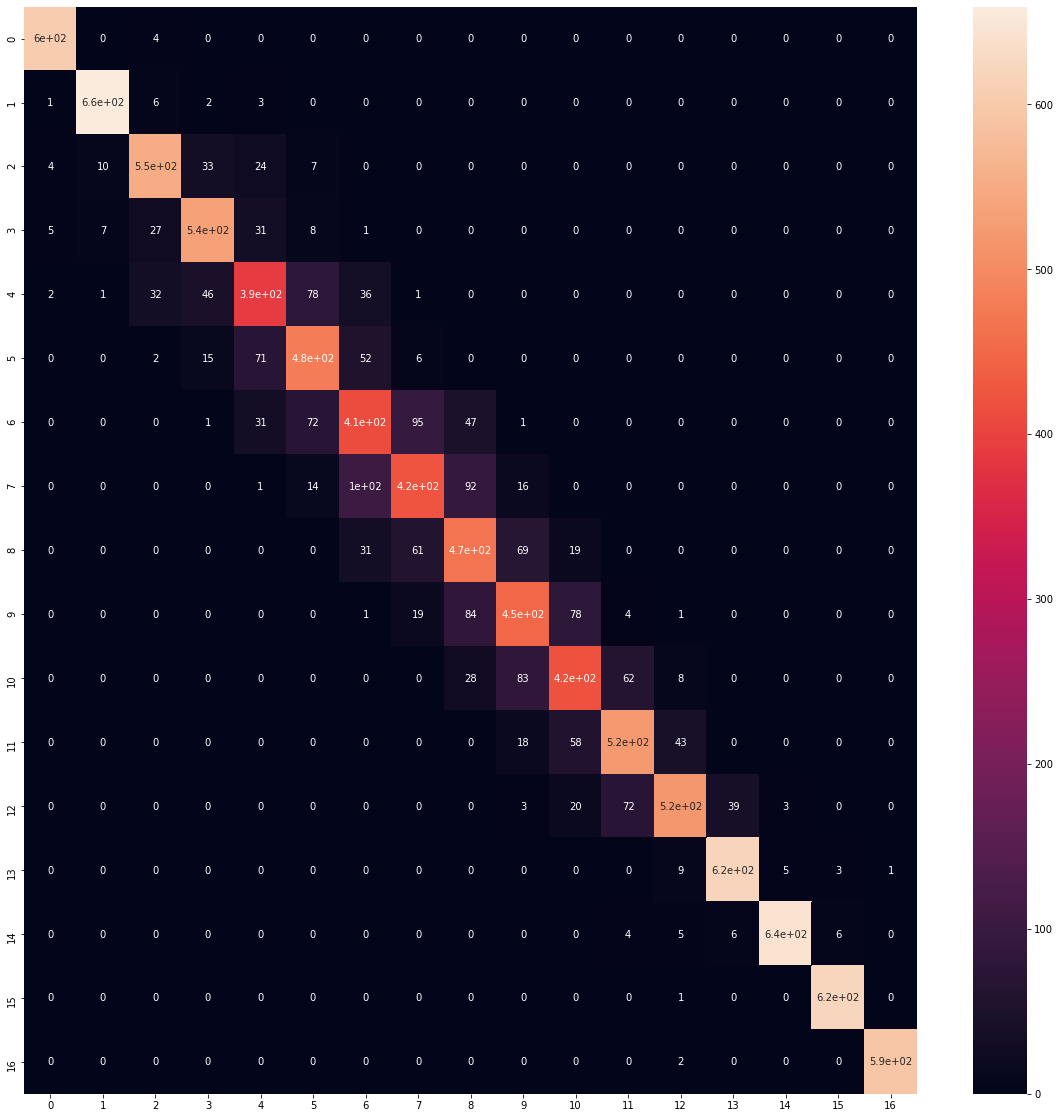

In [56]:
evaluate(xgb)

In [57]:
y_pred=xgb.predict_proba(X_test)
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

0.4631122184328581

In [66]:
xgb.predict_proba(X_test)

array([[4.9152862e-07, 3.6840014e-08, 7.3285764e-07, ..., 9.8852766e-01,
        8.1484450e-04, 9.7737340e-03],
       [1.8160455e-06, 6.2626805e-07, 6.2931222e-06, ..., 1.1434666e-04,
        1.7915932e-05, 2.3204317e-05],
       [3.3591554e-05, 2.0099728e-04, 4.6496224e-02, ..., 8.7429635e-06,
        1.2801130e-06, 5.5742348e-06],
       ...,
       [9.9954152e-01, 1.3595822e-04, 2.7156700e-04, ..., 1.9661357e-08,
        3.4532812e-09, 1.0112965e-08],
       [4.1353916e-09, 4.5807718e-09, 2.3832650e-08, ..., 8.1134167e-05,
        4.4389009e-07, 9.9991465e-01],
       [1.0098139e-05, 2.6436039e-06, 3.7124526e-05, ..., 1.1563576e-04,
        6.4358841e-07, 5.2915784e-06]], dtype=float32)

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Train.csv')
dataset.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset.Downloads=le.fit_transform(dataset.Downloads)

In [24]:
X=dataset.drop('Downloads',axis=1)
y=dataset['Downloads']
from category_encoders.cat_boost import CatBoostEncoder
d=CatBoostEncoder()
d.fit(X,y)
X=d.transform(X)

In [25]:
dataset.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,7
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,9
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,4
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,5
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,9


In [26]:
y

0         7
1         9
2         4
3         5
4         9
         ..
16511     1
16512     4
16513    16
16514     8
16515     7
Name: Downloads, Length: 16516, dtype: int32

In [27]:
X

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,6.673892,6.626757,4.18,1481,6.869033,6.691649,6.672976,7.343712,6.854889,6.902668
1,6.673892,6.845681,4.81,302,6.655429,6.691649,6.672976,7.365165,6.673892,6.656662
2,6.673892,6.967618,4.27,374,7.161267,6.691649,6.672976,6.157260,7.519321,6.656662
3,6.673892,6.608571,4.03,122058,6.869033,6.691649,6.770380,7.010611,6.854889,6.902668
4,6.673892,6.115211,4.60,358,6.869033,7.647371,6.672976,7.359530,6.854889,6.902668
...,...,...,...,...,...,...,...,...,...,...
16511,6.673892,6.675733,4.30,13724,6.869033,6.691649,6.672976,6.524842,6.854889,6.902668
16512,6.673892,6.190605,4.73,70,6.532190,6.691649,6.672976,6.681336,7.891297,6.656662
16513,12.891297,6.675733,4.60,5420,6.462555,6.691649,6.672976,6.064380,6.673892,6.656662
16514,7.557964,7.223597,4.60,1488289,6.869033,6.691649,6.672976,6.844335,6.854889,6.902668
